## Weather forecasting using LSTM

#### In this project we are going to use weather dataset for time series forecasting and we are predicting future 30 days weather by using LSTM

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.



In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('dataset.csv')
df.head()


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11


In [3]:
data = pd.DataFrame(list(df['tempC']), index=df['date_time'], columns=['temp'])

In [4]:
data

,temp
date_time,
2009-01-01 00:00:00,11
2009-01-01 01:00:00,11
2009-01-01 02:00:00,11
2009-01-01 03:00:00,10
2009-01-01 04:00:00,11
...,...
2020-01-01 19:00:00,13
2020-01-01 20:00:00,13
2020-01-01 21:00:00,13


Now we are using only data for 365 days

In [5]:
df=data[:365]

In [6]:
df.shape

(365, 1)

In [7]:
df.isnull().sum()

temp    0
dtype: int64

In [8]:
df=df.dropna(axis=0)

In [9]:
df.shape

(365, 1)

In [10]:
df=df['temp'].values

In [11]:
df[:5]

array([11, 11, 11, 10, 11], dtype=int64)

In [12]:
df=df.reshape(-1,1)

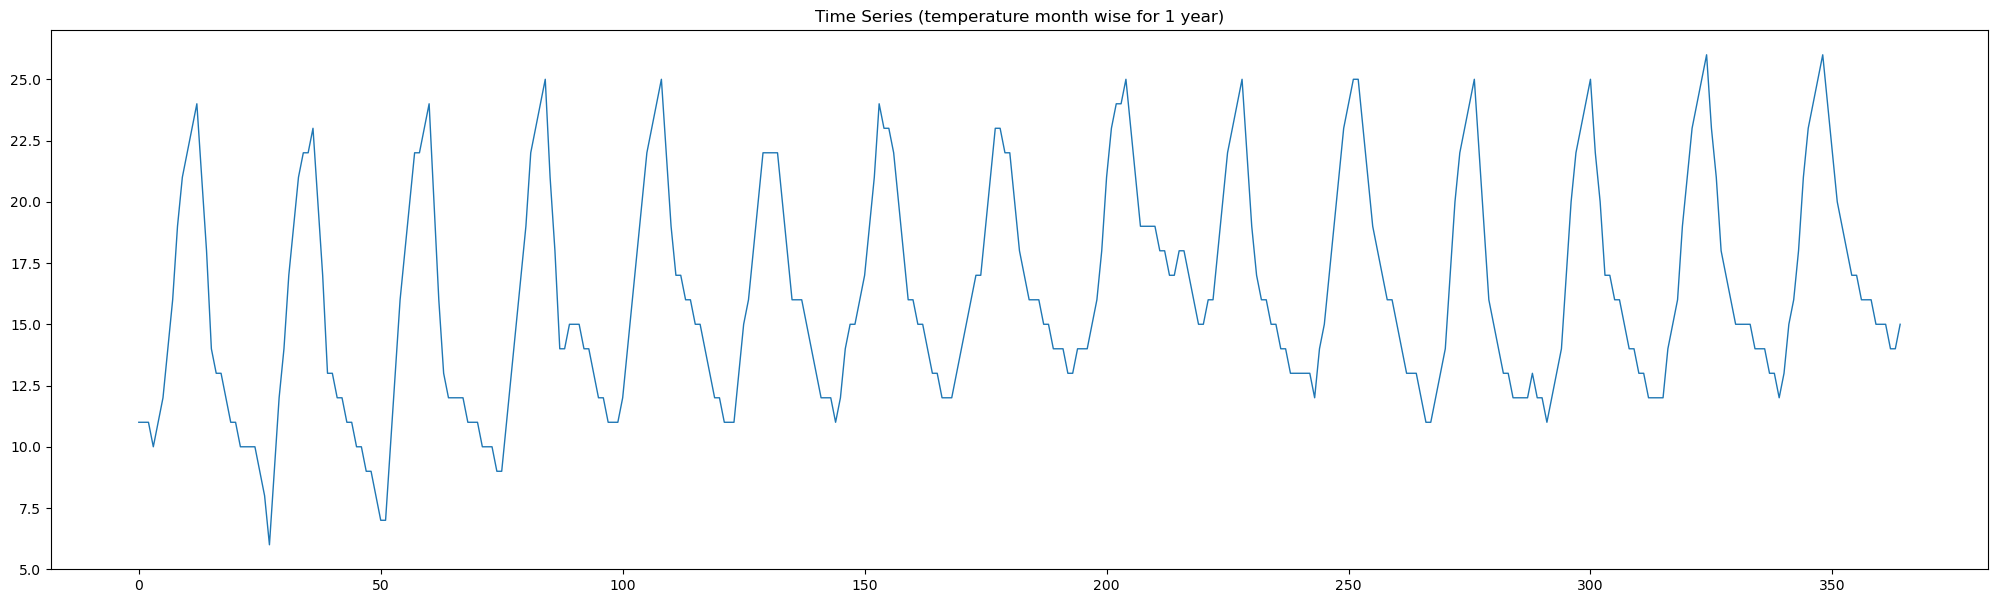

In [13]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

#### Scaling data 

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [15]:
data_scaled[:5]

array([[0.25],
       [0.25],
       [0.25],
       [0.2 ],
       [0.25]])

In [16]:
data_scaled.shape

(365, 1)

In [17]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [18]:
out[:10]

[array([0.25]),
 array([0.2]),
 array([0.2]),
 array([0.2]),
 array([0.2]),
 array([0.15]),
 array([0.1]),
 array([0.]),
 array([0.15]),
 array([0.3])]

reshape 

In [19]:
import numpy as np

In [20]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [21]:
len(df)*0.65

237.25

In [22]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [23]:
inp.shape

(345, 20, 1)

In [24]:
x_train.shape

(237, 20, 1)

In [25]:
x_test.shape

(108, 20, 1)

### importing neccesary libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### Model Building

In [27]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')







In [28]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 [==============================] - 9s 45ms/step - loss: 0.2127
Epoch 2/300
8/8 [==============================] - 0s 46ms/step - loss: 0.0760
Epoch 3/300
8/8 [==============================] - 0s 55ms/step - loss: 0.0669
Epoch 4/300
8/8 [==============================] - 0s 50ms/step - loss: 0.0607
Epoch 5/300
8/8 [==============================] - 0s 45ms/step - loss: 0.0579
Epoch 6/300
8/8 [==============================] - 0s 44ms/step - loss: 0.0555
Epoch 7/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0538
Epoch 8/300
8/8 [==============================] - 0s 39ms/step - loss: 0.0520
Epoch 9/300
8/8 [==============================] - 0s 39ms/step - loss: 0.0499
Epoch 10/300
8/8 [==============================] - 0s 32ms/step - loss: 0.0478
Epoch 11/300
8/8 [==============================] - 0s 31ms/step - loss: 0.0446
Epoch 12/300
8/8 [==============================] - 0s 32ms/step - loss: 0.0416
Epoch 13/300
8/8 [==============================]

In [29]:
# model.evaluate(x_test, y_test)

### Predictions and Model evaluation

Predictions on training set

In [30]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 [==============================] - 2s 12ms/step
Predicted Value 0.18675768
Expected value 0.19999999999999996


Predictions on testing set

In [31]:
predictions=model.predict(x_test)

4/4 [==============================] - 0s 12ms/step


In [32]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.5002442
Expected Value 0.5


In [33]:
predictions.shape

(108, 1)

In [34]:
y_test.shape

(108, 1)

In [35]:
pred_df=pd.DataFrame(predictions)

In [36]:
pred_df['TrueValues']=y_test

In [37]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [38]:
pred_df_new

,Predictions,TrueValues
0,0.594868,0.55
1,0.551112,0.50
2,0.500244,0.50
3,0.483719,0.45
4,0.446580,0.40
...,...,...
103,0.450381,0.45
104,0.434778,0.45
105,0.434148,0.40
106,0.398855,0.40


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

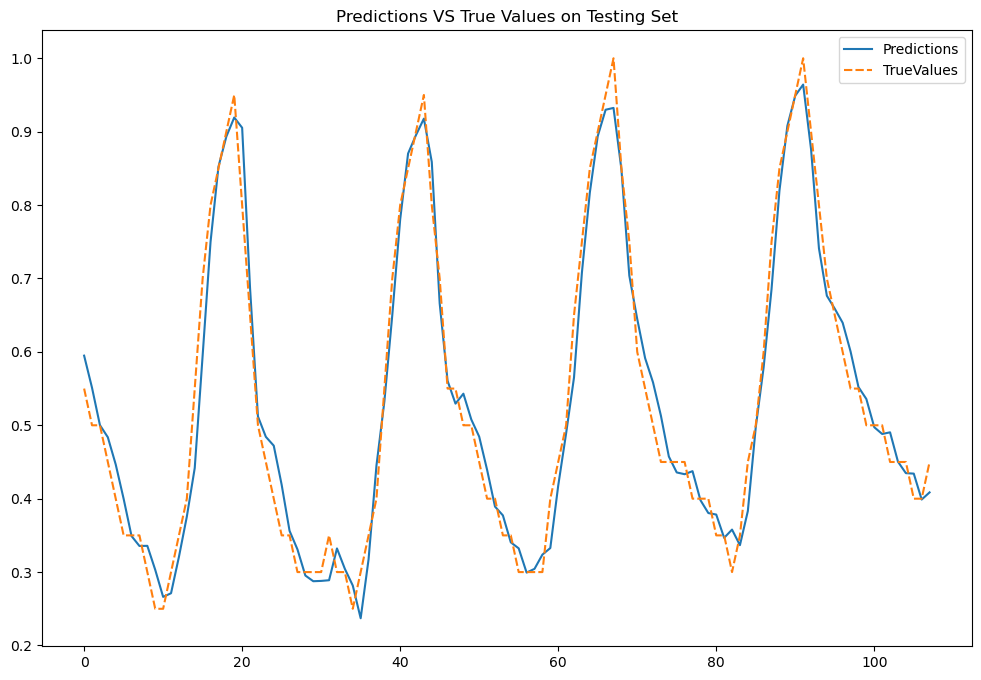

In [39]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

### Weather Predictions for next 30 Days

we are using last 10 days input for 1st day output

In [40]:
data_scaled.shape

(365, 1)

In [41]:
x_input=data_scaled[:20]

In [42]:
x_input.shape

(20, 1)

In [43]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [44]:
x_input.shape

(1, 20)

In [45]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [46]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

creatitng a  functions which returns the next 30 days prediction

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24730003]
1 day input [0.25       0.25       0.2        0.25       0.3        0.4
 0.5        0.65       0.75       0.8        0.85       0.9
 0.75       0.6        0.4        0.35       0.35       0.3
 0.25       0.24730003]
1 day output [[0.23335347]]
2 day input [0.25       0.2        0.25       0.3        0.4        0.5
 0.65       0.75       0.8        0.85       0.9        0.75
 0.6        0.4        0.35       0.35       0.3        0.25
 0.24730003 0.23335347]
2 day output [[0.22740388]]
3 day input [0.2        0.25       0.3        0.4        0.5        0.65
 0.75       0.8        0.85       0.9        0.75       0.6
 0.4        0.35       0.35       0.3        0.25       0.24730003
 0.23335347 0.22740388]
3 day output [[0.22215818]]
4 day input [0.25       0.3        0.4        0.5        0.65       0.75
 0.8        0.85       0.9        0.75       0.6        0.4
 0.35       0.35       0.3        0.25       0.24730003 0.23335347
 0.22740388 0.22215818]
4 day output [[0.2112

In [48]:
data_scaled[:5]

array([[0.25],
       [0.25],
       [0.25],
       [0.2 ],
       [0.25]])

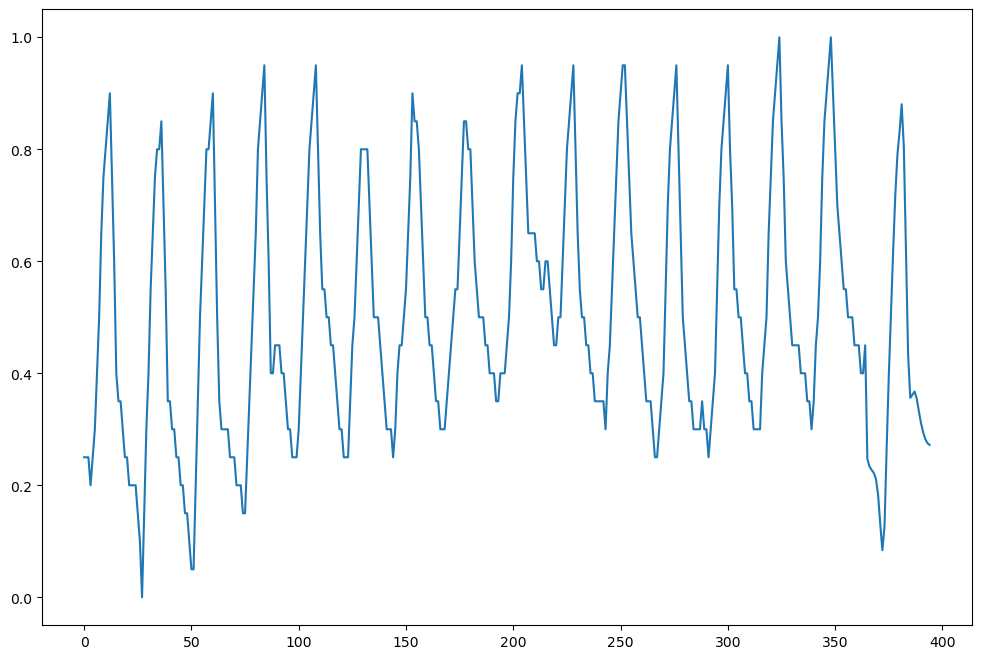

In [49]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)
